# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
'''
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()
'''

In [2]:
athletes = pd.read_csv("athletes.csv")

In [53]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [71]:
athletes.shape

(11538, 11)

In [30]:
#alpha: significance level
alpha = 0.05

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [90]:
def q1():
    
    '''
        scipy.stats.shapiro(x):
        ---------
        Returns (statistic, p-value)
        
    '''
    
    shapiro = sct.shapiro(get_sample(athletes, 'height', n = 3000))
    
    print(shapiro)
    
    if shapiro[1] > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [91]:
q1()

ShapiroResult(statistic=0.9961519837379456, pvalue=5.681722541339695e-07)


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
> Quando mais próximo de uma reta com o ângulo de 45º, mais similares são as distribuições das duas amostras! Como vemos no QQ-Plot, ele até pode parecer ter inclinação de 45º mas é necessário ver a escala dos eixos :)
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

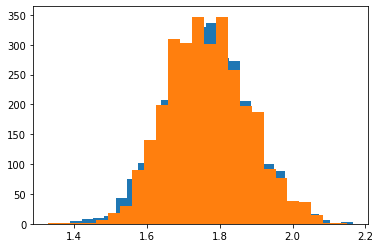

In [136]:
import math

fig, subplot = plt.subplots()

subplot.hist(sct.norm.rvs(1.76678, 0.11240185196624569, size = 3000), bins = 25)

subplot.hist(get_sample(athletes, 'height', n = 3000), bins = 25)

plt.show()

In [106]:
get_sample(athletes, 'height', n = 3000).mean()

1.76678

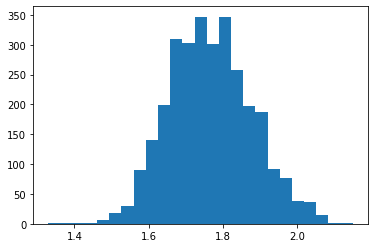

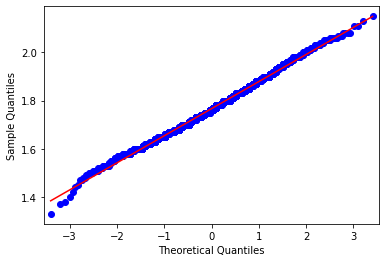

In [100]:
import statsmodels.api as sm
import pylab

#Histogram athletes hight
plt.hist(get_sample(athletes, 'height', n = 3000), bins = 25)

#Quantile-Quantile plot athletes hight
sm.qqplot(get_sample(athletes, 'height', n = 3000), line = 's')
pylab.show()


## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [74]:
def q2():
    '''
        scipy.stats.jarque_bera(x):
        ---------
        Returns (statistic, p-value)
        
    '''
    
    jarque_bera = sct.jarque_bera(get_sample(athletes, 
                                             'height',
                                             n = 3000)
                                 )
    
    if jarque_bera[1] > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [75]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [81]:
def q3():
    
    '''
        scipy.stats.normaltest(x):
    ---------
        Returns (statistic, p-value)
        1. statistic : skewtest and kurtosistest
        
    '''
    
    k2, pvalue = sct.normaltest(get_sample(athletes,
                                           'weight',
                                           n = 3000)
                               )
    print('statistic:', k2, 'p-value:', pvalue)
    
    if pvalue > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [82]:
q3()

statistic: 510.24655809881176 p-value: 1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
> São condizentes, uma vez que o teste de normalidade D'Agostino-Pearson opera com a *Skewness* e *Kustosis*. Aqui vemos que a distribuição apresenta uma assimetria chamada *Positive Skew* ou uma assimetria para a direita. 
* Um _box plot_ também poderia ajudar a entender a resposta.

(array([  6.,  42., 138., 293., 345., 430., 376., 376., 260., 214., 157.,
        134.,  85.,  48.,  24.,  19.,  19.,   9.,  12.,   2.,   4.,   3.,
          0.,   1.,   3.]),
 array([ 37.  ,  41.92,  46.84,  51.76,  56.68,  61.6 ,  66.52,  71.44,
         76.36,  81.28,  86.2 ,  91.12,  96.04, 100.96, 105.88, 110.8 ,
        115.72, 120.64, 125.56, 130.48, 135.4 , 140.32, 145.24, 150.16,
        155.08, 160.  ]),
 <a list of 25 Patch objects>)

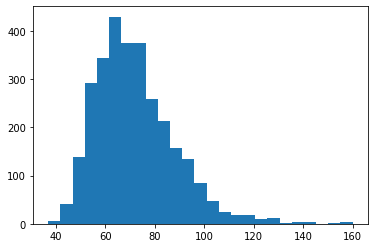

In [78]:
#Histogram athletes weight
plt.hist(get_sample(athletes, 'weight', n = 3000), bins = 25)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [79]:
def q4():
    
    '''
        scipy.stats.normaltest(x):
    ---------
        Returns (statistic, p-value)
        1. statistic : skewtest and kurtosistest
        
    '''
    
    #Log function: e base
    log = np.log(get_sample(athletes, 'weight', n = 3000))
    
    k2, pvalue = sct.normaltest(log)
    print('statistic:', k2, 'p-value:', pvalue)
    
    if pvalue > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [80]:
q4()

statistic: 45.91534331977353 p-value: 1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

> Claro! Pois a transformação logarítmica permite uma redução na assimetria, então nossa distribuição com uma *Positive Skew* passa a ser mais simétrica, como vemos no histograma \o/

* Você esperava um resultado diferente agora?

(array([  3.,   3.,  18.,  24.,  64., 133., 181., 243., 239., 346., 339.,
        256., 303., 249., 159., 157., 139.,  54.,  22.,  23.,  20.,  13.,
          5.,   3.,   4.]),
 array([3.61091791, 3.66948815, 3.72805838, 3.78662862, 3.84519886,
        3.90376909, 3.96233933, 4.02090957, 4.0794798 , 4.13805004,
        4.19662027, 4.25519051, 4.31376075, 4.37233098, 4.43090122,
        4.48947145, 4.54804169, 4.60661193, 4.66518216, 4.7237524 ,
        4.78232263, 4.84089287, 4.89946311, 4.95803334, 5.01660358,
        5.07517382]),
 <a list of 25 Patch objects>)

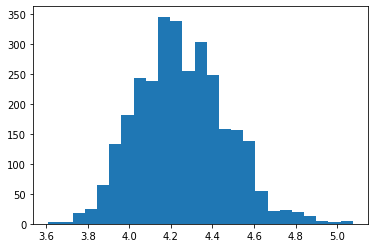

In [83]:
#Histogram athletes weight
plt.hist(np.log(get_sample(athletes, 'weight', n = 3000)), bins = 25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? (Null hypothesis) Responda com um boolean (`True` ou `False`).

In [49]:
#Selects athletes from each country
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [86]:
def q5():
    
    '''
        scipy.stats.ttest_ind(a,b):
    ---------
        Returns (statistic, p-value)
        
    '''
    
    #Unequal variance T-Test with height athletes 
    stat, pvalue = sct.ttest_ind(bra['height'], usa['height'], 
                                 equal_var = False, 
                                 nan_policy = 'omit'
                    )
    
    print((stat, pvalue))
    
    if pvalue > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [87]:
q5()

(-3.2232436467501855, 0.0013080041830140115)


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [47]:
def q6():
    
    '''
        scipy.stats.ttest_ind(a,b):
    ---------
        Returns (statistic, p-value)
        
    '''
    
    stat, pvalue = sct.ttest_ind(bra['height'], can['height'], 
                                 equal_var = False, 
                                 nan_policy = 'omit'
                    )
    
    print((stat, pvalue))
    
    if pvalue > alpha:
        #Fail to reject the null hypothesis
        return True
    else:
        #Reject the null hypothesis
        return False

In [48]:
q6()

(0.6389304914365109, 0.5230827295440921)


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [84]:
def q7():
    
    '''
        scipy.stats.ttest_ind(a,b):
    ---------
        Returns (statistic, p-value)
        
    '''
    
    #Unequal variance T-Test with height athletes 
    stat, pvalue = sct.ttest_ind(usa['height'], can['height'], 
                                 equal_var = False, 
                                 nan_policy = 'omit'
                    )
    
    print((stat, pvalue))
    
    return float(round(pvalue, 8))

In [85]:
q7()

(3.516987632488539, 0.0004660129347389851)


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Referências:
1.https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687
2.https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
3.https://www.investopedia.com/terms/t/t-test.asp